In [97]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
# Loading user data and logs
user_data = pd.read_csv('/content/user_data.csv')
logs = pd.read_csv('/content/logs.csv')

In [99]:
# Getting information about user data and logs
user_data.info()
logs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [100]:
# Getting the shape of user data and logs
user_data.shape
logs.shape

(4500, 4)

In [101]:
# Determining the client with the most successful operations
success_client = logs[logs.success == True].client.value_counts()
max_num = success_client.max()
max_success_users = success_client[success_client == max_num]
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

In [102]:
# Determining the platform with the highest number of successful operations
platform_success = logs[logs.success == True].platform.value_counts().idxmax()

In [103]:
platform_success

'phone'

In [104]:
# Merging user data and logs on client identifier
premium_logs = logs.merge(user_data, on='client')

In [105]:
premium_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [106]:
# Determining the platform preferred by premium clients
premium_logs[premium_logs.premium == True].platform.value_counts().idxmax()

'phone'

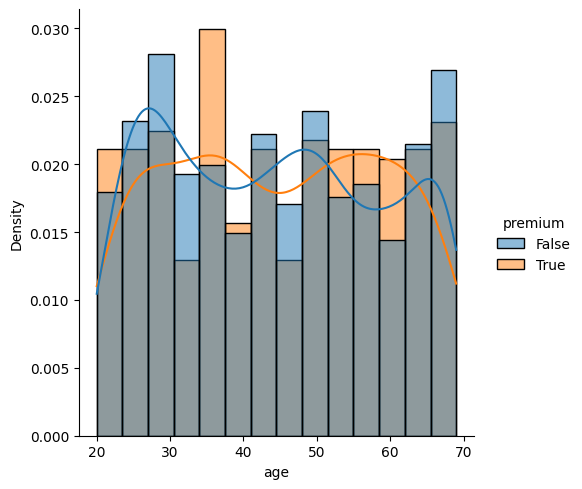

In [107]:
# Visualizing the distribution of client ages based on their type (premium or not)
sns.displot(data=premium_logs, x='age', hue='premium', kde=True, kind="hist", stat='density', common_norm=False, bins=14)

<Axes: xlabel='client', ylabel='count'>

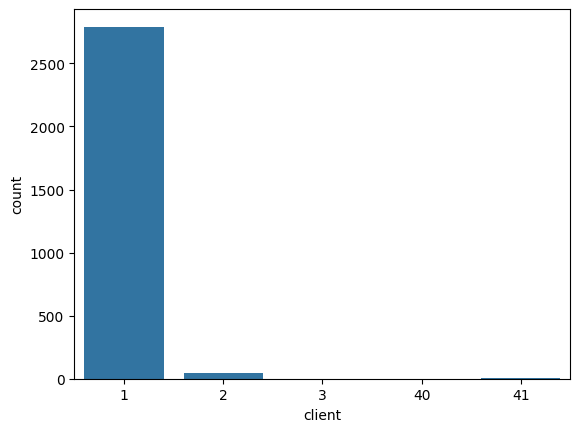

In [108]:
# Visualizing the number of successful operations
success_count = logs.loc[logs.success == True].client.value_counts()
success_count.rename('successes')
sns.countplot(x=success_count)

<Axes: xlabel='age', ylabel='count'>

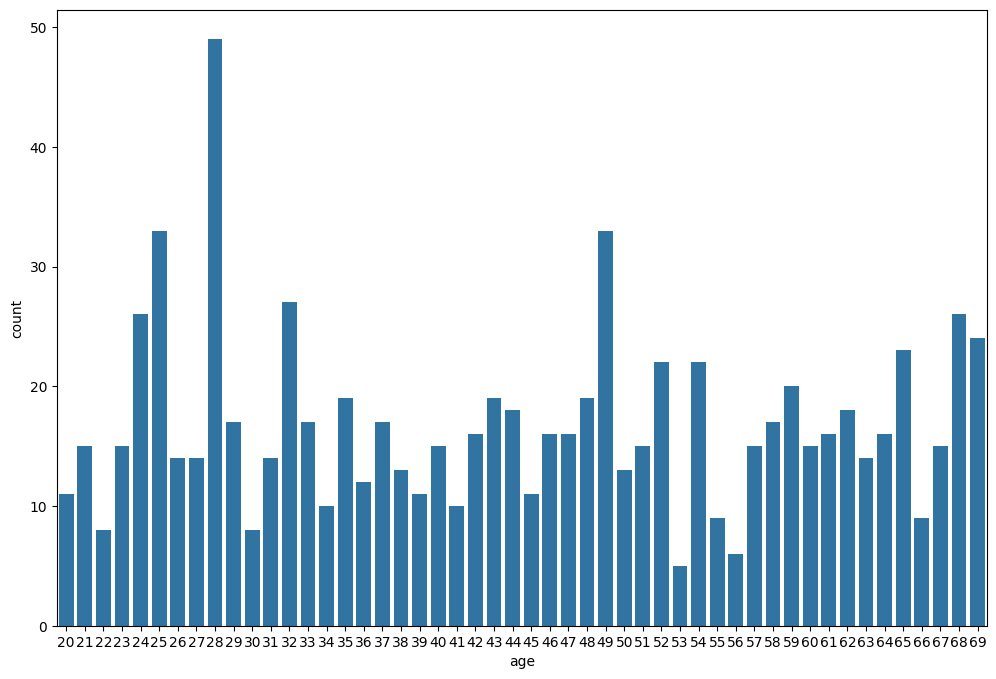

In [109]:
# Visualizing the number of successful operations made on the "computer" platform based on age
plt.figure(figsize=(12,8))
sns.countplot(data=premium_logs.loc[(premium_logs['platform'] == 'computer') & (premium_logs['success'] == True)], x='age')